<a href="https://colab.research.google.com/github/EgiNHardo/Proyecto0/blob/main/Copia_de_RENDERIZADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-eed104c4ff13>:21: RuntimeWarning: invalid value encountered in divide
  Nx /= norm
<ipython-input-1-eed104c4ff13>:22: RuntimeWarning: invalid value encountered in divide
  Ny /= norm
<ipython-input-1-eed104c4ff13>:23: RuntimeWarning: invalid value encountered in divide
  Nz /= norm


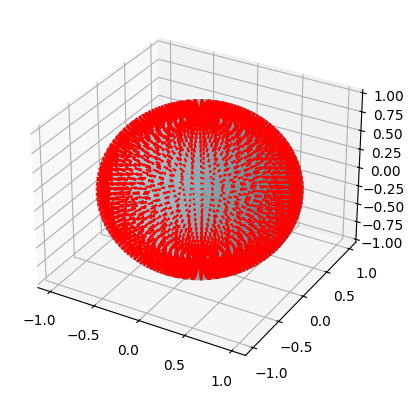

In [1]:
import numpy as np
import matplotlib.pyplot as plt

r = 1
u = np.linspace(0, np.pi, 50)
v = np.linspace(0, 2 * np.pi, 50)
u, v = np.meshgrid(u, v)

x = r * np.sin(u) * np.cos(v)
y = r * np.sin(u) * np.sin(v)
z = r * np.cos(u)

du = np.gradient(x, axis=0), np.gradient(y, axis=0), np.gradient(z, axis=0)
dv = np.gradient(x, axis=1), np.gradient(y, axis=1), np.gradient(z, axis=1)

Nx = du[1]*dv[2] - du[2]*dv[1]
Ny = du[2]*dv[0] - du[0]*dv[2]
Nz = du[0]*dv[1] - du[1]*dv[0]

norm = np.sqrt(Nx**2 + Ny**2 + Nz**2)
Nx /= norm
Ny /= norm
Nz /= norm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='lightblue', alpha=0.6)
ax.quiver(x, y, z, Nx, Ny, Nz, length=0.1, color='r')
plt.show()


In [2]:
pip install scikit-image numpy matplotlib


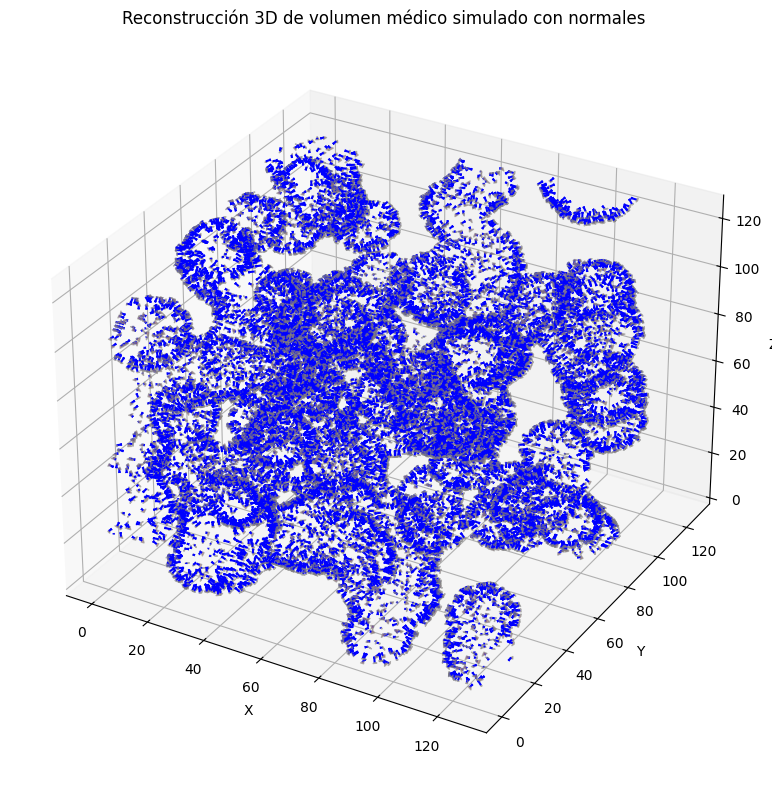

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage.data import binary_blobs
from scipy.ndimage import zoom

# 1. Crear un volumen 3D sintético (simula una masa u órgano)
volume = binary_blobs(length=64, blob_size_fraction=0.2, n_dim=3, volume_fraction=0.3)
volume = zoom(volume.astype(float), 2.0)

# 2. Reconstrucción de la superficie usando Marching Cubes
verts, faces, _, _ = measure.marching_cubes(volume, level=0.5)

# 3. Calcular las normales de la superficie (vector normal a cada triángulo)
face_normals = np.cross(
    verts[faces[:, 1]] - verts[faces[:, 0]],
    verts[faces[:, 2]] - verts[faces[:, 0]]
)
face_normals /= np.linalg.norm(face_normals, axis=1)[:, np.newaxis]

# 4. Visualización con matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie
for i, face in enumerate(faces[::20]):  # reducir densidad para visualizar normales
    tri = verts[face]
    ax.plot_trisurf(tri[:, 0], tri[:, 1], tri[:, 2], color='lightcoral', alpha=0.6, edgecolor='gray')

    # Agregar normal en el centroide del triángulo
    centroid = tri.mean(axis=0)
    normal = face_normals[i*20]
    ax.quiver(
        centroid[0], centroid[1], centroid[2],
        normal[0], normal[1], normal[2],
        length=2.0, color='blue'
    )

ax.set_title("Reconstrucción 3D de volumen médico simulado con normales")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.tight_layout()
plt.show()
